<a href="https://colab.research.google.com/github/ViniciusSuga/portfolio/blob/main/Analisando_os_Dados_da_cidade_de_Buenos_Aires_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Buenos Aires

O [Airbnb](https://www.airbnb.com.br/) nos últmios anos vem se consolidando  como a maior empresa hoteleira da atualidade, mesmo sem possuir nenhum hotel!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Em 2021, possuia mais de 5,4 milhões de anúncios ativos, mesmo em época pandêmica, notamos um aumento no número de anúncios, principalmente nas áreas rurais e mais afastadas dos grandes centros urbanos.
<center><img alt="Analisando Airbnb" width="100%" src="https://t.ctcdn.com.br/BsAi5YdOh0AQhY0VX_0XzfxQyDU=/1024x0/smart/i435629.png"></center>

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Método

Na maioria dos estudos/projetos iremos utilizar uma rotina baseada na metodologia CRISP-DM (*Cross-industry standard process for data mining*), ou algo semalhante a ela, tendo em vista que isto não é algo imutável.

Esse método define o ciclo de um projeto em 6 fases, são elas:

1.   Compreensão do negócio
2.   Compreensão dos dados
3.   Preparação dos dados
4.   Modelagem
5.   Avaliação
6.   Desenvolvimento    

Além de ser o modo de análise/mineração/ciencie de dados mais usado no mundo, também facilita a interpretação e obtenção de bons *insights* a partir de grandes massas de dados.

### Obtenção dos Dados





In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2021-12-25/visualisations/listings.csv')

### Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a estrutura do nosso *dataset*, analisando as 5 primeiras entradas.


In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60523,-58.41042,Entire home/apt,5113,3,1,2011-01-31,0.01,1,365,0,NaN
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,6647,2,27,2021-04-03,0.23,1,236,1,NaN
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59777,-58.39664,Private room,2761,1,20,2017-12-11,0.14,1,0,0,NaN
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,1,2018-12-18,0.03,7,365,0,9789
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2893,1,0,NaN,NaN,7,365,0,NaN


#### **Análise exploratória dos dados.**

Este df possui as informações resumidas do Airbnb em Buenos Aires, o arquivo completo, podemos encontrar no [Site](http://insideairbnb.com/get-the-data.html).

In [5]:
# identificar o volume e os tipo de dados do DataFrame
print (f'Este arquivo possui {(df.shape[0])} linhas (entradas)\nEste arquivo possui {(df.shape[1])} colunas (variáveis)')
(df.dtypes)

Este arquivo possui 17318 linhas (entradas)
Este arquivo possui 18 colunas (variáveis)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Ao verificar que os preços estão na moeda local (pesos argentinos) fazemos as conversões para ficar mais entendível, ao nosso ponto de vista, no dia da análise (07/04/22) o valor do peso estava R$0,042.

In [6]:
df.price = df['price'] * 0.042

In [7]:
df['price'].sort_values(ascending=False)

12752    42948.276
7145     42948.276
3924     42948.276
5941     42948.276
9467     42948.276
           ...    
1105        10.920
5138         9.450
6402         0.000
13895        0.000
13909        0.000
Name: price, Length: 17318, dtype: float64

#### **Quantos são os valores ausentes?**

In [8]:
# Verificando as porcentagens de valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.986026
reviews_per_month                 0.302575
last_review                       0.302575
host_name                         0.000751
name                              0.000289
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Podemos verificar que há 3 variáveis com valores ausentes, são eles *license*, *Reviews_per_month* e *last_review*. Como não iremos montar um modelo de *MachineLearning*, apenas analisar estes dados, podemos deixá-los ali, excluí-los também não é uma boa opção, já que 30% dos dados representam uma boa parcela do nosso *DataFrame*.


####**Tratando os outliers**

Para verificarmos a presença deles, antes, plotaremos histogramas, assim, dentificaremos as distribuições das variáveis.

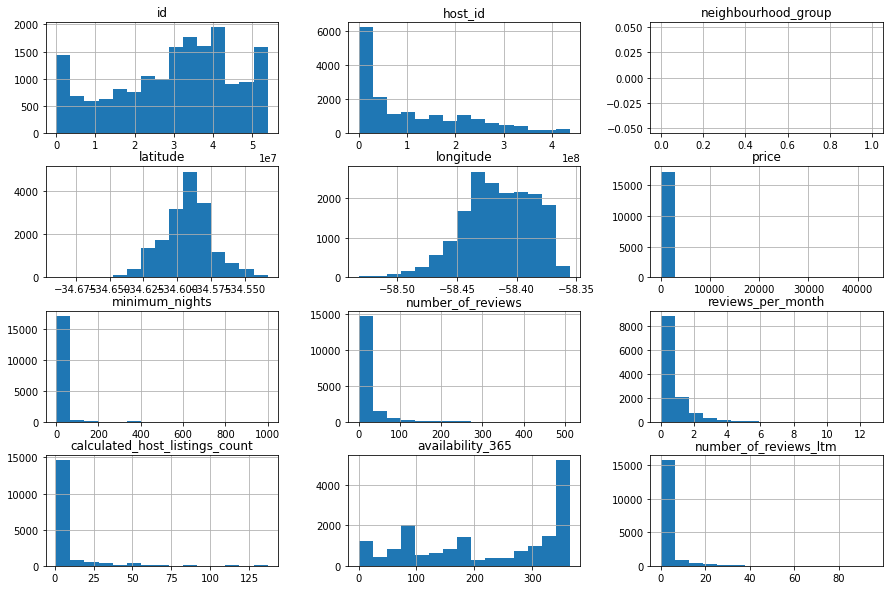

In [9]:
df.hist(bins=15, figsize=(15,10));

Com os histogramas, percebemos alguns outliers, como por exemplo, nas colunas  `price`, `minimum_nights` e `calculated_host_listing_count`.
Uma das formas de verificar e confirmar que realmente, é um *outlier* é realizar um resumo estatística, através da função `describe()` das variáveis numéricas.

In [10]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,17318.000000,17318.000000,17318.000000,12078.000000,17318.000000,17318.000000
mean,276.671583,7.508719,17.242118,0.669376,8.001155,223.724044
std,1346.956411,24.491571,34.802116,0.839172,18.914734,125.834745
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,90.804000,2.000000,0.000000,0.120000,1.000000,90.000000
50%,147.000000,3.000000,3.000000,0.365000,2.000000,251.000000
75%,236.208000,5.000000,18.000000,0.930000,4.000000,353.000000
max,42948.276000,1000.000000,512.000000,12.730000,137.000000,365.000000


Já logo de cara, confirmamos algumas suposições, por exemplo, a variável `price` possui 75% dos valores abaixo de R$236,00, entretanto, seu valor máximo alcança os 42 mil reais.
Outro ponto, é alguns imóveis apresentarem o número mínimo de noites (`minimum_nights`) acima de 365 dias.

In [11]:
# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights valores acima de 30:")
print(f"{(len(df[df.minimum_nights > 30]))} anúncios")
print(f"Isso representa {((len(df[df.minimum_nights > 30]) / df.shape[0])*100):.3}% de todo o nosso DataFrame")

minimum_nights valores acima de 30:
403 anúncios
Isso representa 2.33% de todo o nosso DataFrame


In [12]:
# ver quantidade de valores acima de 1700 para price
print("price valores acima de 1700:")
print(f"{(len(df[df.price > 1700]))} anúncios")
print(f"Isso representa {((len(df[df.price > 1700]) / df.shape[0])*100):.3}% de todo o nosso DataFrame")

price valores acima de 1700:
164 anúncios
Isso representa 0.947% de todo o nosso DataFrame


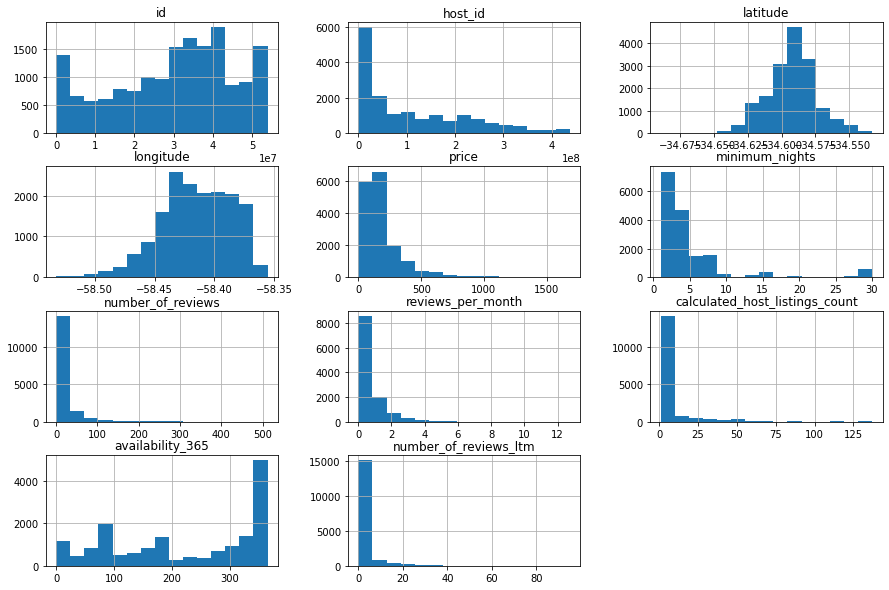

In [13]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1700].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Optei por fazer a retirada da coluna 'neightbourhood_group' pois era uma coluna 100% vazia

#### **Qual a correlação existente entre as variáveis**

Outro diagrama interessante de ser analisado, é matriz de correlação, essa matriz determina o nível de associação entre os valores. Este valor, é calculado usando o índice de correlação linear.

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.025533,-0.025704,-0.027010,0.139309,0.060746
minimum_nights,-0.025533,1.000000,-0.076130,-0.139395,0.014039,-0.010917
number_of_reviews,-0.025704,-0.076130,1.000000,0.622092,-0.050870,-0.053376
reviews_per_month,-0.027010,-0.139395,0.622092,1.000000,0.019858,-0.059437
calculated_host_listings_count,0.139309,0.014039,-0.050870,0.019858,1.000000,0.058378
availability_365,0.060746,-0.010917,-0.053376,-0.059437,0.058378,1.000000


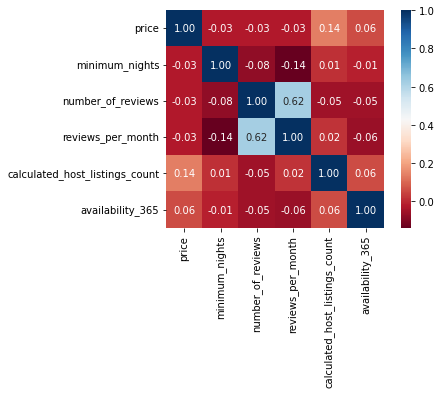

In [16]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

#### **Qual o tipo de imóvel mais alugado no Airbnb?**

Outra informação extremamente útil, e que também podemos responder com o que nos foi disponibilizado, é a quantidade e tipo de hospedagem que é mais usualmente alugada/anunciada.

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13328
Private room        2956
Shared room          321
Hotel room           152
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.795369
Private room       0.176404
Shared room        0.019156
Hotel room         0.009071
Name: room_type, dtype: float64

#### **Onde está concentrado o maior número de imóveis?**

A infomação da quantidade de ofertas é bastante útil para fazer análises das localidades onde os aluguéis são mais caros.

In [14]:
df['neighbourhood'].value_counts().sort_values(ascending=False)[:10]

Palermo         5521
Recoleta        2791
San Nicolas     1079
Retiro           943
Balvanera        794
Belgrano         778
Monserrat        680
Almagro          611
San Telmo        557
Villa Crespo     534
Name: neighbourhood, dtype: int64

#### **Qual a localidade mais cara do dataset?**

Uma boa e simples forma de identificar onde estão os maiores preços, é utilizando o método `groupby()`.


In [21]:
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)[:15]

neighbourhood
Puerto Madero    488.574786
Villa Real       324.969750
Mataderos        258.510000
Floresta         257.607000
Villa Soldati    246.190000
Palermo          239.552005
Liniers          237.037500
Recoleta         220.163660
Villa Luro       218.148000
Coghlan          212.926737
Villa Devoto     207.659094
Retiro           200.723440
Nuñez            195.662119
Belgrano         188.926883
Colegiales       187.000774
Name: price, dtype: float64

In [23]:
# plotar os imóveis pela latitude-longitude
pallete_10 = ["#468C98","#9d8df1","#b8cdf8","#95f2d9","#1cfeba","#dcedb9","#d2e59e",
              "#cbd081","#e7ad99","#ce796b"]

px.set_mapbox_access_token('pk.eyJ1IjoidmluaWNpdXMtc3VnYSIsImEiOiJjbDFxc3ptam8wbmNuM2RvZDI3aDF1bXU4In0.slujr6AlFRSTlImYpiZ7VA')

fig = px.scatter_mapbox(df_clean, lat='latitude', lon='longitude', color='price',
                        color_continuous_scale=pallete_10, size_max=15,
                        zoom=10, hover_name='neighbourhood')

fig.show()

### Conclusões
Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis, após serem tratadas afim de um resultado apenas de estudo, porém, deve-se fazer uma análise mais aprofundada para o tratamento dos dados.

Através do mapa, pudemos realmente averigual algumas informações que foram vistas apenas em números, por exemplo, a região mais cara de aluguel foi em *Puerto Madero*, e pudemos verificar uma real diferença de cores no bairro.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.